In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:/Users/yugal/Downloads/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


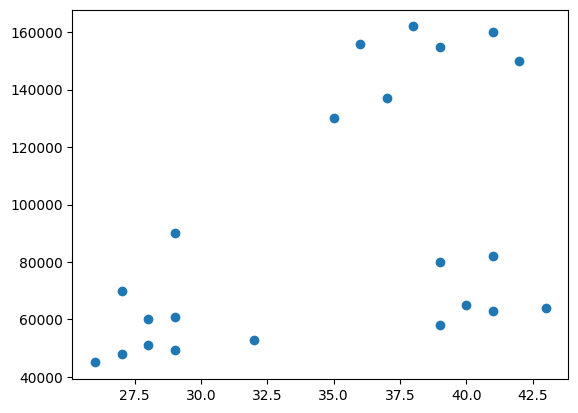

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters = 3, n_init=10)
km

KMeans(n_clusters=3, n_init=10)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


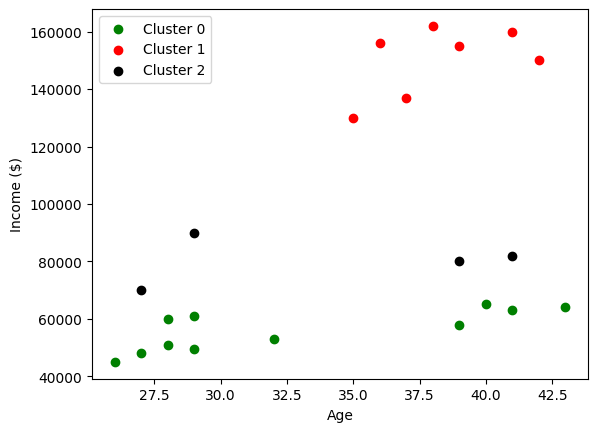

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

plt.show()


In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [9]:
km = KMeans(n_clusters = 3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [10]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [11]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

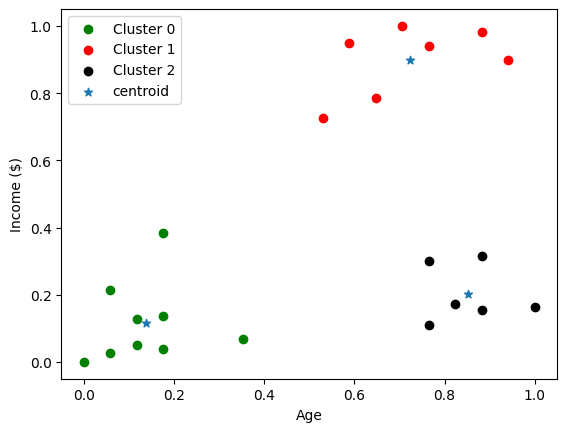

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker = '*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

plt.show()


C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yugal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

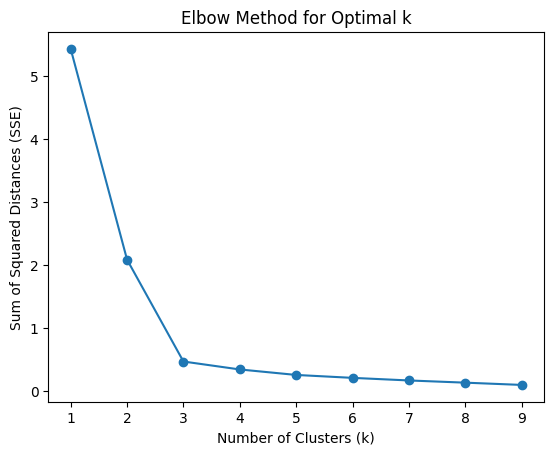

In [13]:
# Define the range of k values
K_rng = range(1, 10)

# Initialize an empty list to store the sum of squared distances for each k
sse = []

# Iterate over each k value
for k in K_rng:
    # Create a KMeans instance with the current k value
    km = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init
    #                                     ^^^^^^^^
    
    # Fit the KMeans model to the data
    km.fit(df[['Age', 'Income($)']])
    
    # Append the sum of squared distances (inertia) to the list
    sse.append(km.inertia_)
    
# Plot the elbow curve to visualize the optimal k value
plt.plot(K_rng, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()
